In [31]:
# open accelData pickle
import pickle
with open('drive/MyDrive/Pickles/accelData.pickle', 'rb') as handle:
    accelData = pickle.load(handle)

In [3]:
print(accelData)

{'Measurements': [         Time   AccXRA   AccYRA   AccZRA   AccXLA   AccYLA   AccZLA   AccXRW  \
0      231.57  0.07910  0.02148 -0.98242  0.07031  0.49902 -0.85840 -0.89062   
1      231.58  0.08691  0.02344 -0.98828  0.07031  0.50391 -0.86035 -0.90430   
2      231.59  0.08691  0.02344 -0.97949  0.07129  0.50488 -0.86133 -0.91797   
3      231.60  0.08398  0.02637 -0.99023  0.07129  0.50488 -0.86133 -0.91797   
4      231.61  0.07324  0.02637 -0.96387  0.06738  0.50488 -0.86133 -0.89355   
...       ...      ...      ...      ...      ...      ...      ...      ...   
69033  921.90 -0.83008  0.26562  0.50098  1.16309  0.04394  0.03320  0.76562   
69034  921.91 -0.83301  0.26562  0.49512  1.10840  0.04102  0.03320  0.76562   
69035  921.92 -0.83105  0.26562  0.49512  1.07910  0.03711  0.05664  0.76562   
69036  921.93 -0.83398  0.26465  0.49219  1.00098  0.03711  0.08691  0.76562   
69037  921.94 -0.83594  0.26465  0.48730  0.75977  0.07910  0.09180  0.76562   

        AccYRW   AccZ

In [5]:
# Print number of unique values in accelData['Code'] which is a list
print(len(set(accelData['Code'])))


35


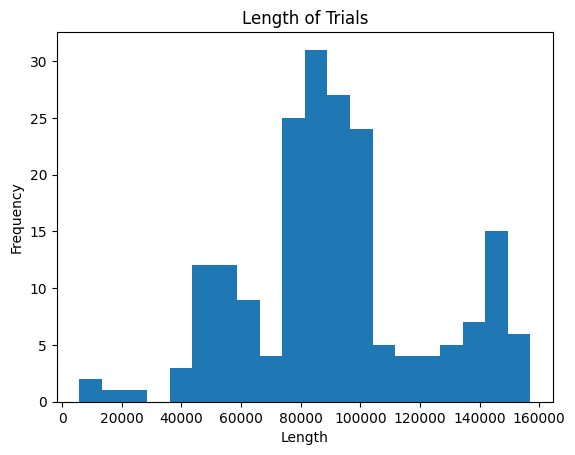

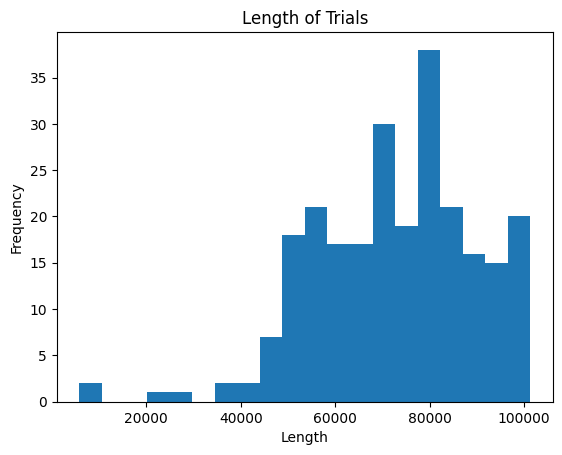

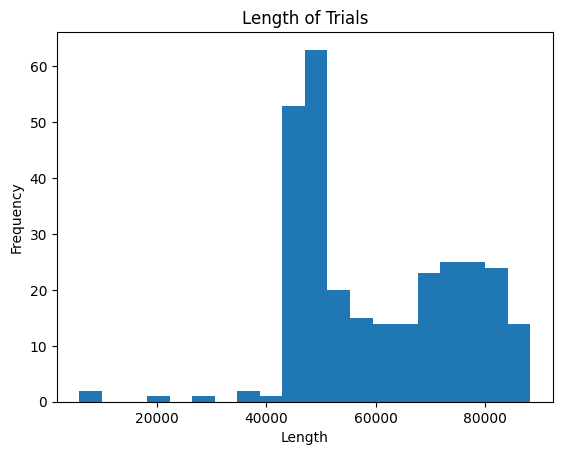

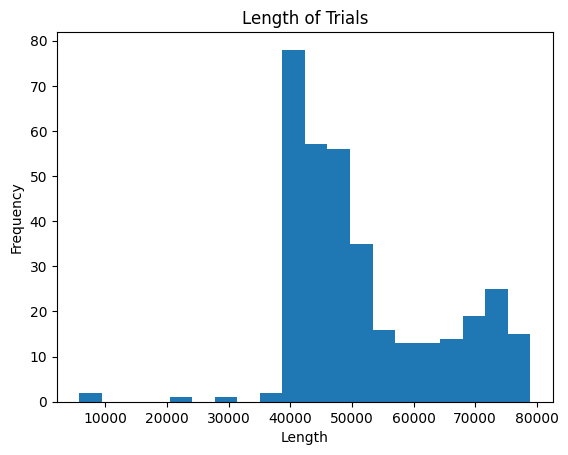

In [32]:
# Necessary imports
import numpy as np
import matplotlib.pyplot as plt
for i in range(4):
    K = 50

    # Split some of the longer trials in half
    numRowsAccel = [df.shape[0] for df in accelData['Measurements']]
    sortedIndices = np.argsort(numRowsAccel)

    # Get the indices of the top k dataframes
    topKIndices = sortedIndices[-K:]

    # Get the top k dataframes
    topKDataframes = [accelData['Measurements'][i] for i in topKIndices]

    # Get the top k corresponding months, IDs, labels
    topKMonths = [accelData['Month'][i] for i in topKIndices]
    topKCodes = [accelData['Code'][i] for i in topKIndices]
    topKAbnormal = [accelData['Abnormal'][i] for i in topKIndices]
    topKAIMS = [accelData['AIMS'][i] for i in topKIndices]
    topKOptimality = [accelData['Optimality'][i] for i in topKIndices]

    # Remove the dataframes from accelData
    for i in sorted(topKIndices, reverse=True):
        del accelData['Measurements'][i]
        del accelData['Month'][i]
        del accelData['Code'][i]
        del accelData['Abnormal'][i]
        del accelData['AIMS'][i]
        del accelData['Optimality'][i]

    # Split the top k dataframes into two and reinsert into structure
    for i in range(len(topKDataframes)):
        df = topKDataframes[i]
        month = topKMonths[i]
        code = topKCodes[i]
        abnormal = topKAbnormal[i]
        aims = topKAIMS[i]
        optimality = topKOptimality[i]
        
        first_half = df.iloc[0:df.shape[0]//2]
        second_half = df.iloc[df.shape[0]//2:df.shape[0]]
        
        # Append the first and second halves to accelData
        accelData['Measurements'].append(first_half)
        accelData['Measurements'].append(second_half)
        
        # Append the corresponding values for month, code, abnormal, aims, and optimality
        accelData['Month'].extend([month, month])
        accelData['Code'].extend([code, code])
        accelData['Abnormal'].extend([abnormal, abnormal])
        accelData['AIMS'].extend([aims, aims])
        accelData['Optimality'].extend([optimality, optimality])

    # PLot histogram of length of trials
    lengths = [len(accelData['Measurements'][i]) for i in range(len(accelData['Measurements']))]
    plt.hist(lengths, bins=20)
    plt.title("Length of Trials")
    plt.xlabel("Length")
    plt.ylabel("Frequency")
    plt.show()
        
    # Memory management
    del numRowsAccel, sortedIndices, topKIndices, topKDataframes, topKMonths, topKCodes, topKAbnormal, topKAIMS, topKOptimality, first_half, second_half, df, month, code, abnormal, aims, optimality

In [33]:
accelDataGrouped = {}

for i in range(len(accelData['Code'])):
    code = accelData['Code'][i]
    if code not in accelDataGrouped:
        accelDataGrouped[code] = {'Measurements': [], 'Month':[], 'Abnormal':[], 'AIMS':[], 'Optimality':[]}
    accelDataGrouped[code]['Measurements'].append(accelData['Measurements'][i])
    accelDataGrouped[code]['Month'].append(accelData['Month'][i])
    accelDataGrouped[code]['Abnormal'].append(accelData['Abnormal'][i])
    accelDataGrouped[code]['AIMS'].append(accelData['AIMS'][i])
    accelDataGrouped[code]['Optimality'].append(accelData['Optimality'][i])

# Print accelDataGrouped without the measurements bit
for key, value in accelDataGrouped.items():
    print(key, value['Month'], value['Abnormal'], value['AIMS'], value['Optimality'])


1023 [1] [1.0] [999] [14]
1020 [1, 2, 3] [1.0, 0.0, 0.0] [999, 3, 999] [30, 31, 26]
1019 [1, 2, 4, 4, 5, 5, 5, 5, 3, 3, 3, 3] [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] [0, 1, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0] [13, 23, 8, 8, 9, 9, 9, 9, 6, 6, 6, 6]
1018 [0, 1, 2, 5, 5, 4, 4, 3, 3, 3, 3] [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] [1, 2, 2, 0, 0, 1, 1, 0, 0, 0, 0] [14, 24, 23, 15, 15, 15, 15, 13, 13, 13, 13]
1017 [0, 1, 2, 6, 5, 5, 4, 4, 4, 4] [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] [999, 1, 1, 0, 0, 0, 0, 0, 0, 0] [29, 27, 21, 999, 9, 9, 7, 7, 7, 7]
1016 [2, 3, 5, 5, 4, 4, 4, 4, 6, 6, 6, 6, 1, 1, 1, 1] [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [3, 3, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2] [29, 24, 26, 26, 28, 28, 28, 28, 999, 999, 999, 999, 37, 37, 37, 37]
1014 [1, 2, 4, 4, 3, 3] [0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [1, 1, 0, 0, 999, 999] [33, 32, 26, 26, 26, 26]
1013 [1, 2, 6, 6, 4, 4, 4, 4, 3, 3, 3, 3] [1.0, 0.0

In [34]:
# Print number of trials
print(len(accelData['Measurements']))

347


In [35]:
# Remove time column from accelData Measurements
accelData['Measurements with Time'] = accelData['Measurements']

for i in range(len(accelData['Measurements'])):
    accelData['Measurements'][i] = accelData['Measurements'][i].iloc[:, 1:]

In [36]:
# Smooth the normalised data using a moving average (mean)
accelData['Smoothed (mean)'] = []
# Smooth the data using a moving average (median)
accelData['Smoothed (median)'] = []

for i in range(len(accelData['Measurements'])):
    df = accelData['Measurements'][i]

    # Mean smoothing
    smoothed_mean = df.rolling(window=10).mean()
    smoothed_mean = smoothed_mean.fillna(df)
    # downsampling
    smoothed_mean = smoothed_mean.groupby(smoothed_mean.index // 10).mean()
    accelData['Smoothed (mean)'].append(smoothed_mean)

    # Median smoothing
    smoothed_med = df.rolling(window=10).median()
    smoothed_med = smoothed_med.fillna(df)
    # downsampling
    smoothed_med = smoothed_med.groupby(smoothed_med.index // 10).median()
    accelData['Smoothed (median)'].append(smoothed_med)


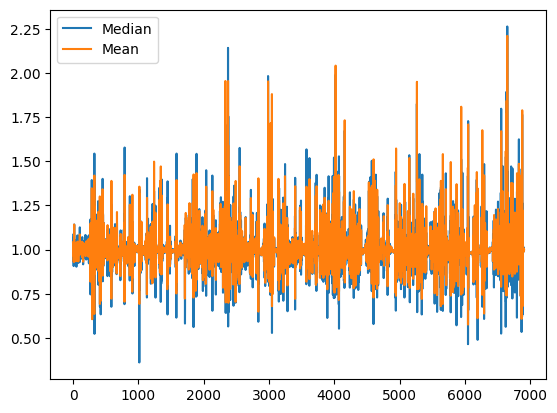

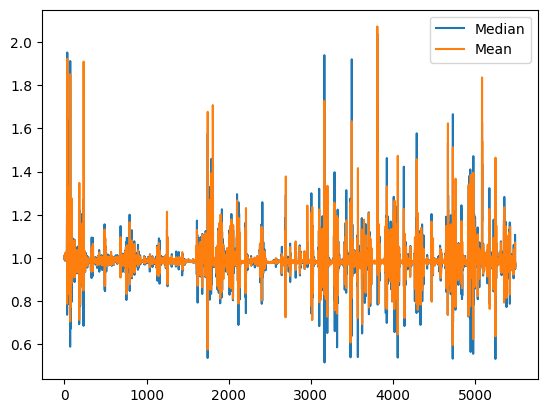

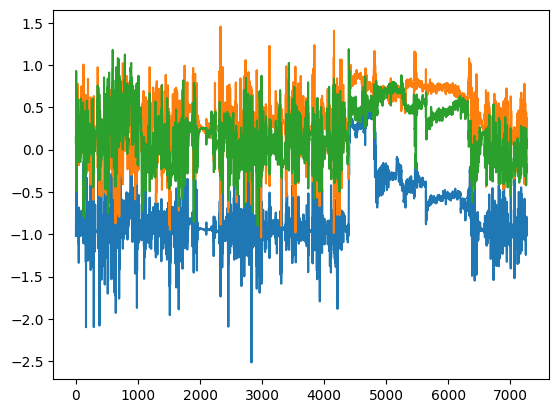

In [37]:
# Visualise the smoothing
# Visualise the normalised data
plt.plot(accelData['Smoothed (median)'][0]['AccSumRW'], label='Median')
plt.plot(accelData['Smoothed (mean)'][0]['AccSumRW'], label='Mean')
plt.legend()
plt.show()

plt.plot(accelData['Smoothed (median)'][1]['AccSumRW'], label='Median')
plt.plot(accelData['Smoothed (mean)'][1]['AccSumRW'], label='Mean')
plt.legend()
plt.show()

plt.plot(accelData['Smoothed (median)'][2]['AccXRA'], label='Median')
plt.plot(accelData['Smoothed (median)'][2]['AccYRA'], label='Median')
plt.plot(accelData['Smoothed (median)'][2]['AccZRA'], label='Median')


In [41]:
# Normalised the smoothed data so that the accSumRW, accSumRA, accSumLW, accSumLA columns when they have a value of 1, 
# the value stays at 1
accelData['Normalised Mean'] = []
accelData['Normalised Median'] = []

for i in range(len(accelData['Measurements'])):

    df = accelData['Smoothed (mean)'][i]

    # Normalise the data
    df = df / df.max()

    # Replace NaNs with 0
    df = df.fillna(0)

    accelData['Normalised Mean'].append(df)

    df = accelData['Smoothed (median)'][i]

    # Normalise the data
    df = df / df.max()

    # Replace NaNs with 0
    df = df.fillna(0)

    accelData['Normalised Median'].append(df)



In [44]:
import pandas as pd
# Add padding to smoothed (mean) then normalised and smoothed(median) then normalised dataframes

# Get the maximum number of rows in the dataframes
maxRows = max([df.shape[0] for df in accelData['Normalised Mean']])
print("Max number of rows in the dataframes:", maxRows)
# Get the number of columns in the dataframes
numCols = accelData['Normalised Mean'][0].shape[1]

# Add padding to the dataframes in accelData['Smoothed (mean) then Normalised']
for i in range(len(accelData['Normalised Mean'])):
    df = accelData['Normalised Mean'][i]
    padding = pd.DataFrame(np.zeros((maxRows - df.shape[0], numCols)), columns=df.columns)
    df = df.append(padding, ignore_index=True)
    accelData['Normalised Mean'][i] = df

# Add padding to the dataframes in accelData['Smoothed (median) then Normalised']
for i in range(len(accelData['Normalised Median'])):
    df = accelData['Normalised Median'][i]
    padding = pd.DataFrame(np.zeros((maxRows - df.shape[0], numCols)), columns=df.columns)
    df = df.append(padding, ignore_index=True)
    accelData['Normalised Median'][i] = df

Max number of rows in the dataframes: 7896


In [46]:
# dump AIMS, normalised mean and normalised median dataframes to pickle
with open('drive/MyDrive/Pickles/moreTrials/Normalised Mean.pickle', 'wb') as handle:
    pickle.dump(accelData['Normalised Mean'], handle)

with open('drive/MyDrive/Pickles/moreTrials/Normalised Median.pickle', 'wb') as handle:
    pickle.dump(accelData['Normalised Median'], handle)

with open('drive/MyDrive/Pickles/moreTrials/Abnormal.pickle', 'wb') as handle:
    pickle.dump(accelData['Abnormal'], handle)

In [48]:
# one hot encode the abnormal column
from sklearn.preprocessing import OneHotEncoder

# one hot encode the abnormal column
enc = OneHotEncoder(sparse=False)
abnormal = np.array(accelData['Abnormal']).reshape(-1, 1)
abnormal = enc.fit_transform(abnormal)
print(abnormal)

# dump the one hot encoded abnormal column to pickle
with open('drive/MyDrive/Pickles/moreTrials/OneHotEncodedAbnormal.pickle', 'wb') as handle:
    pickle.dump(abnormal, handle)

[[0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [55]:
# Segmentation of the data: we will do this by splitting the data into 100 row windows

# Split the data into 100 row windows
windowSize = 100

# Split the normalised mean data into 100 row windows
accelData['Normalised Mean Segmented'] = []

for i in range(len(accelData['Normalised Mean'])):
    df = accelData['Normalised Mean'][i]
    numWindows = df.shape[0] // windowSize
    windows = [df.iloc[i*windowSize:(i+1)*windowSize] for i in range(numWindows)]
    accelData['Normalised Mean Segmented'].append(windows)

# Sanity check
print(len(accelData['Normalised Mean Segmented']))
print(len(accelData['Normalised Mean Segmented'][0]))
print(len(accelData['Normalised Mean Segmented'][0][0]))

for i in range(len(accelData['Normalised Mean Segmented'])):
    print(len(accelData['Normalised Mean Segmented'][i]))

347
78
100
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78

In [ ]:
# train a CNN on each window of the normalised mean data

# For predicting, predict a label for each window of the trial, if the majority of the predictions is above a certain threshold,
# then the trial is classified as abnormal, else it is classified as normal

# Windows = normalised mean segmented



In [56]:
# For each trial, use unsupervised learning to cluster the windows in each trial
# Use the clustering levels of the windows to determine the abnormality of the trial
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Get the number of clusters for each trial
accelData['NumClusters'] = []

for i in range(len(accelData['Normalised Mean Segmented'])):
    trial = accelData['Normalised Mean Segmented'][i]
    numClusters = []

    for window in trial:
        # Standardise the data
        scaler = StandardScaler()
        window = scaler.fit_transform(window)

        # Reduce the dimensionality of the data
        pca = PCA(n_components=2)
        window = pca.fit_transform(window)

        # Use the silhouette score to determine the number of clusters
        maxClusters = min(10, window.shape[0])
        scores = []

        for k in range(2, maxClusters):
            kmeans = KMeans(n_clusters=k)
            kmeans.fit(window)
            score = silhouette_score(window, kmeans.labels_)
            scores.append(score)

        numClusters.append(np.argmax(scores) + 2)

    accelData['NumClusters'].append(numClusters)

# Sanity check
print(len(accelData['NumClusters']))

# dump the number of clusters to pickle
with open('drive/MyDrive/Pickles/moreTrials/NumClusters.pickle', 'wb') as handle:
    pickle.dump(accelData['NumClusters'], handle)

# Use the number of clusters to determine the abnormality of the trial
# Train a classifier to predict the abnormality of the trial based on the number of clusters

# Features = accelData['NumClusters']
# Labels = accelData['Abnormal']
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

Features = np.array(accelData['NumClusters']).reshape(-1, 1)
Labels = np.array(accelData['Abnormal']).reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(Features, Labels, test_size=0.2, random_state=42)

# Train the classifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Test the classifier
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)



C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:30: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:30: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (7). Possibly due to duplicate points in X.
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:30: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (8). Possibly due to duplicate points in X.
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:30: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (9). Possibly due to duplicate points in X.
c:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\decomposition\_pca.py:501: RuntimeWarning: invalid value encountered in t

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)